## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  86.397268  1080.530620  0.929300   5.264744  1.608159
1  41.370361  1074.052402  0.891118  10.439099  1.455685
2  67.068090  1552.406932  0.097986   9.712077  1.137643
3  50.405924  1363.330862  0.278959   8.532781  1.262958
4  66.566740   766.199592  0.680283   2.218087  1.528732


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9683305	total: 57.1ms	remaining: 57s
1:	learn: 0.9607899	total: 57.8ms	remaining: 28.9s
2:	learn: 0.9509598	total: 58.4ms	remaining: 19.4s
3:	learn: 0.9427086	total: 59ms	remaining: 14.7s
4:	learn: 0.9331168	total: 59.7ms	remaining: 11.9s
5:	learn: 0.9244674	total: 60.4ms	remaining: 10s
6:	learn: 0.9138649	total: 61.3ms	remaining: 8.69s
7:	learn: 0.9040751	total: 61.7ms	remaining: 7.66s
8:	learn: 0.8969599	total: 62.6ms	remaining: 6.89s
9:	learn: 0.8888296	total: 63ms	remaining: 6.24s
10:	learn: 0.8784593	total: 63.6ms	remaining: 5.72s
11:	learn: 0.8706234	total: 64ms	remaining: 5.27s
12:	learn: 0.8592948	total: 64.5ms	remaining: 4.89s
13:	learn: 0.8514373	total: 64.8ms	remaining: 4.57s
14:	learn: 0.8424341	total: 65.3ms	remaining: 4.29s
15:	learn: 0.8351480	total: 65.7ms	remaining: 4.04s
16:	learn: 0.8272456	total: 66ms	remaining: 3.81s
17:	learn: 0.8203220	total: 66.3ms	remaining: 3.62s
18:	learn: 0.8110918	total: 66.8ms	remaining: 3.45s
19:	

115:	learn: 0.3838317	total: 102ms	remaining: 774ms
116:	learn: 0.3814076	total: 102ms	remaining: 770ms
117:	learn: 0.3787043	total: 102ms	remaining: 765ms
118:	learn: 0.3766655	total: 103ms	remaining: 760ms
119:	learn: 0.3747258	total: 103ms	remaining: 755ms
120:	learn: 0.3723168	total: 103ms	remaining: 750ms
121:	learn: 0.3703434	total: 104ms	remaining: 747ms
122:	learn: 0.3681005	total: 104ms	remaining: 742ms
123:	learn: 0.3663374	total: 104ms	remaining: 738ms
124:	learn: 0.3641632	total: 105ms	remaining: 733ms
125:	learn: 0.3624861	total: 105ms	remaining: 729ms
126:	learn: 0.3596031	total: 106ms	remaining: 725ms
127:	learn: 0.3569097	total: 106ms	remaining: 721ms
128:	learn: 0.3549835	total: 106ms	remaining: 718ms
129:	learn: 0.3530534	total: 107ms	remaining: 714ms
130:	learn: 0.3506668	total: 107ms	remaining: 710ms
131:	learn: 0.3489608	total: 107ms	remaining: 706ms
132:	learn: 0.3467335	total: 108ms	remaining: 702ms
133:	learn: 0.3440207	total: 108ms	remaining: 697ms
134:	learn: 

352:	learn: 0.1435436	total: 183ms	remaining: 335ms
353:	learn: 0.1430022	total: 183ms	remaining: 335ms
354:	learn: 0.1425363	total: 184ms	remaining: 334ms
355:	learn: 0.1421577	total: 184ms	remaining: 333ms
356:	learn: 0.1419499	total: 184ms	remaining: 332ms
357:	learn: 0.1417364	total: 185ms	remaining: 331ms
358:	learn: 0.1411008	total: 185ms	remaining: 330ms
359:	learn: 0.1406553	total: 185ms	remaining: 329ms
360:	learn: 0.1405070	total: 186ms	remaining: 329ms
361:	learn: 0.1403386	total: 186ms	remaining: 328ms
362:	learn: 0.1401181	total: 186ms	remaining: 327ms
363:	learn: 0.1394993	total: 187ms	remaining: 326ms
364:	learn: 0.1391462	total: 187ms	remaining: 325ms
365:	learn: 0.1389597	total: 187ms	remaining: 325ms
366:	learn: 0.1387551	total: 188ms	remaining: 324ms
367:	learn: 0.1384036	total: 188ms	remaining: 323ms
368:	learn: 0.1380614	total: 189ms	remaining: 322ms
369:	learn: 0.1378499	total: 189ms	remaining: 321ms
370:	learn: 0.1376558	total: 189ms	remaining: 321ms
371:	learn: 

623:	learn: 0.0755600	total: 280ms	remaining: 169ms
624:	learn: 0.0754866	total: 281ms	remaining: 169ms
625:	learn: 0.0753418	total: 281ms	remaining: 168ms
626:	learn: 0.0752695	total: 282ms	remaining: 168ms
627:	learn: 0.0751981	total: 282ms	remaining: 167ms
628:	learn: 0.0749804	total: 282ms	remaining: 167ms
629:	learn: 0.0747923	total: 283ms	remaining: 166ms
630:	learn: 0.0747217	total: 283ms	remaining: 166ms
631:	learn: 0.0746380	total: 284ms	remaining: 165ms
632:	learn: 0.0745685	total: 284ms	remaining: 165ms
633:	learn: 0.0744877	total: 284ms	remaining: 164ms
634:	learn: 0.0742746	total: 285ms	remaining: 164ms
635:	learn: 0.0741171	total: 285ms	remaining: 163ms
636:	learn: 0.0740038	total: 285ms	remaining: 163ms
637:	learn: 0.0739377	total: 286ms	remaining: 162ms
638:	learn: 0.0738724	total: 286ms	remaining: 162ms
639:	learn: 0.0737953	total: 287ms	remaining: 161ms
640:	learn: 0.0734137	total: 287ms	remaining: 161ms
641:	learn: 0.0733032	total: 288ms	remaining: 160ms
642:	learn: 

818:	learn: 0.0448271	total: 362ms	remaining: 80.1ms
819:	learn: 0.0447027	total: 363ms	remaining: 79.7ms
820:	learn: 0.0446559	total: 363ms	remaining: 79.2ms
821:	learn: 0.0445615	total: 364ms	remaining: 78.9ms
822:	learn: 0.0445155	total: 365ms	remaining: 78.5ms
823:	learn: 0.0443937	total: 365ms	remaining: 78ms
824:	learn: 0.0443018	total: 366ms	remaining: 77.5ms
825:	learn: 0.0441696	total: 366ms	remaining: 77.1ms
826:	learn: 0.0441245	total: 367ms	remaining: 76.7ms
827:	learn: 0.0440052	total: 367ms	remaining: 76.3ms
828:	learn: 0.0438769	total: 367ms	remaining: 75.8ms
829:	learn: 0.0437870	total: 368ms	remaining: 75.3ms
830:	learn: 0.0436620	total: 368ms	remaining: 74.9ms
831:	learn: 0.0434355	total: 369ms	remaining: 74.5ms
832:	learn: 0.0433474	total: 369ms	remaining: 74ms
833:	learn: 0.0432256	total: 370ms	remaining: 73.6ms
834:	learn: 0.0430031	total: 370ms	remaining: 73.1ms
835:	learn: 0.0429168	total: 371ms	remaining: 72.7ms
836:	learn: 0.0428272	total: 371ms	remaining: 72.3

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

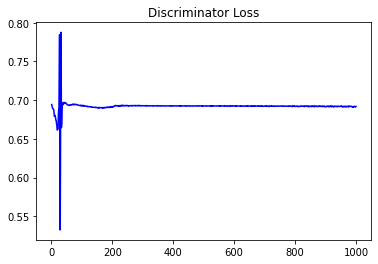

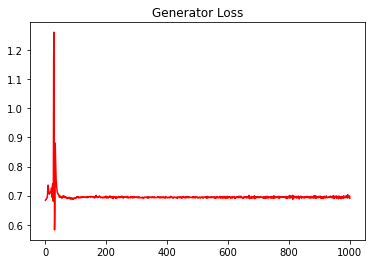

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.28341393008038335


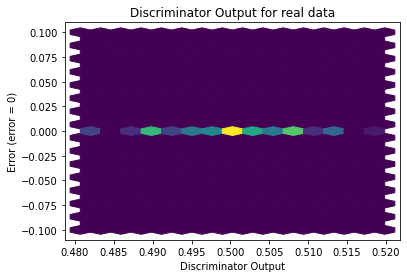

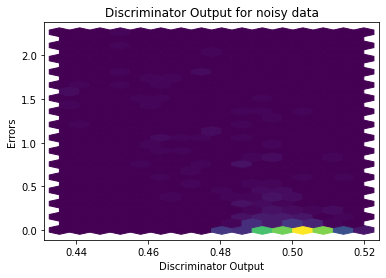

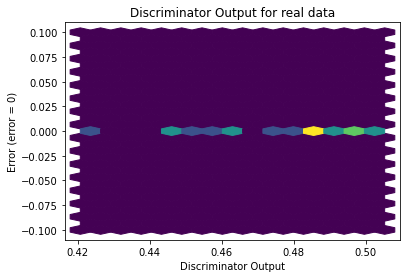

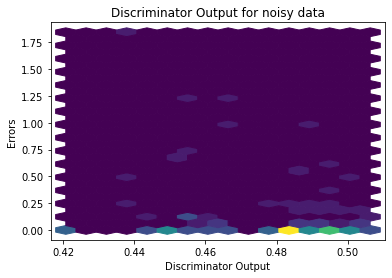

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


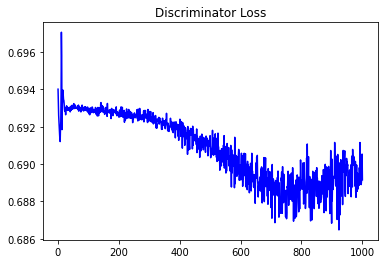

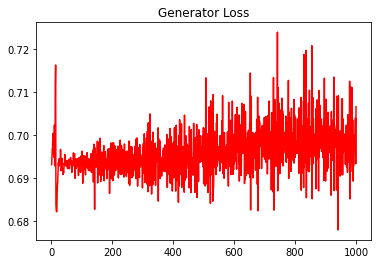

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.3292869428955752


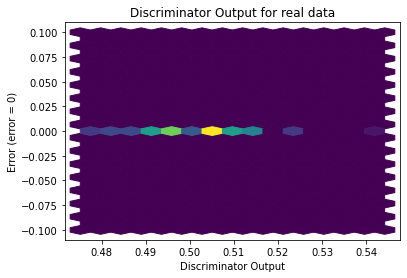

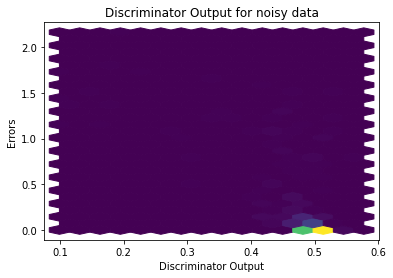

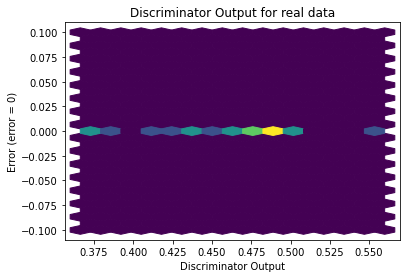

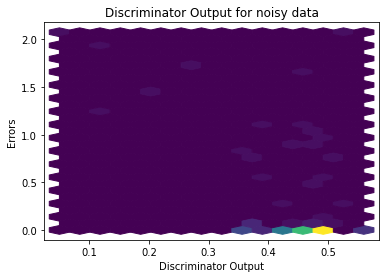

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1777]], requires_grad=True)
